1.0
0.05
(0.4375, 0.9)
0.05
(0.5625, 0.9)


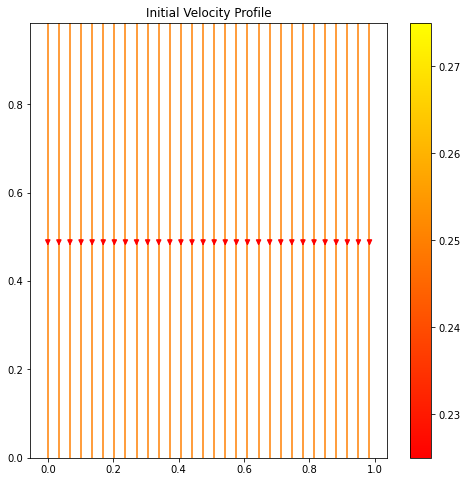

/home/jackie/Desktop/ib2.py:72: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  U[0,k]=np.sum(w*u[0][ii]);
/home/jackie/Desktop/ib2.py:73: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  U[1,k]=np.sum(w*u[1][ii]);
/home/jackie/Desktop/ib2.py:101: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  f[0][ii]+=(c*F[0,k])*w #Spr

<Figure size 720x576 with 0 Axes>

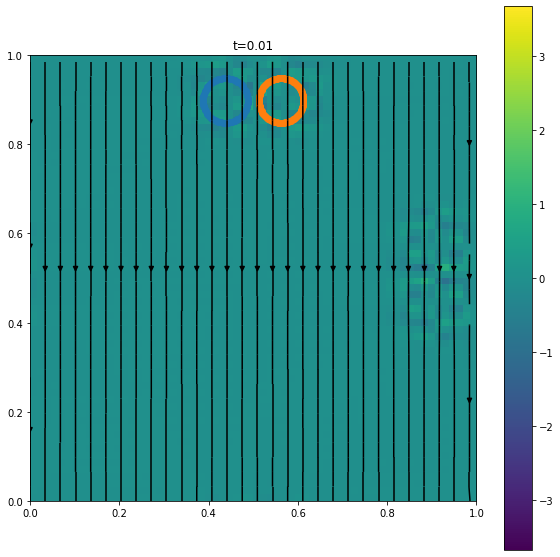

<Figure size 720x576 with 0 Axes>

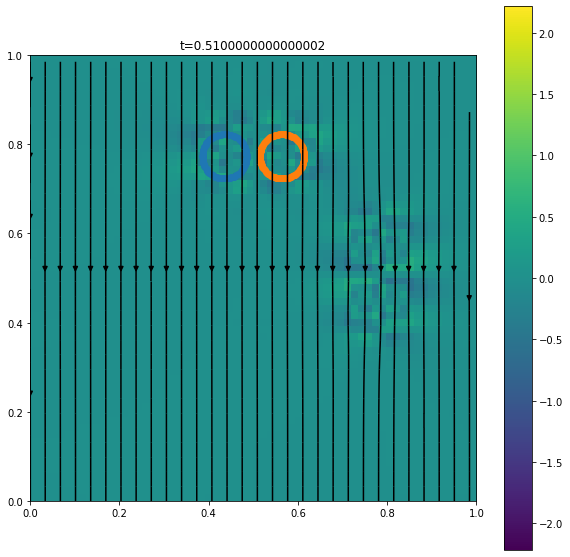

<Figure size 720x576 with 0 Axes>

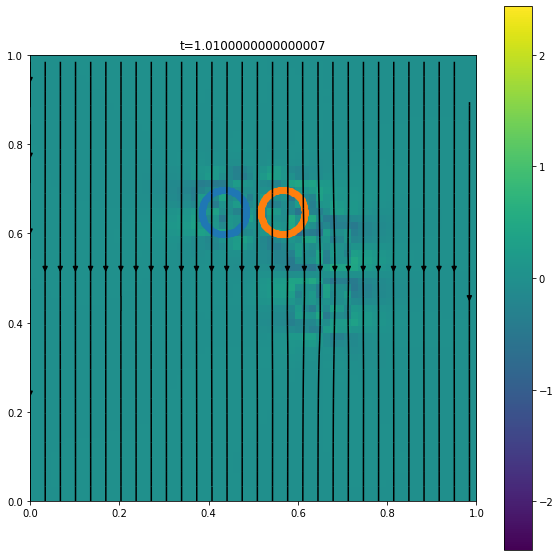

<Figure size 720x576 with 0 Axes>

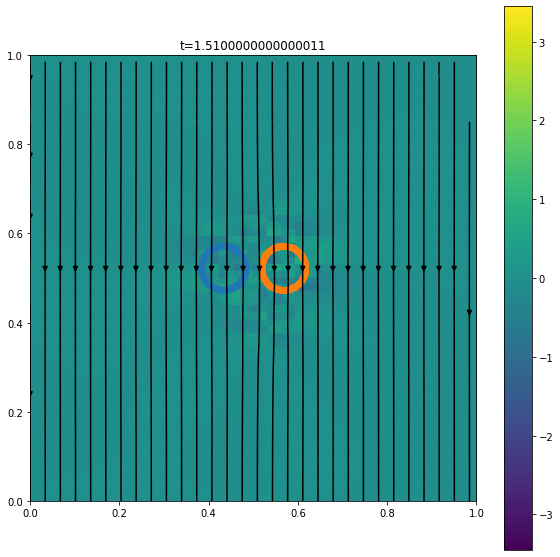

<Figure size 720x576 with 0 Axes>

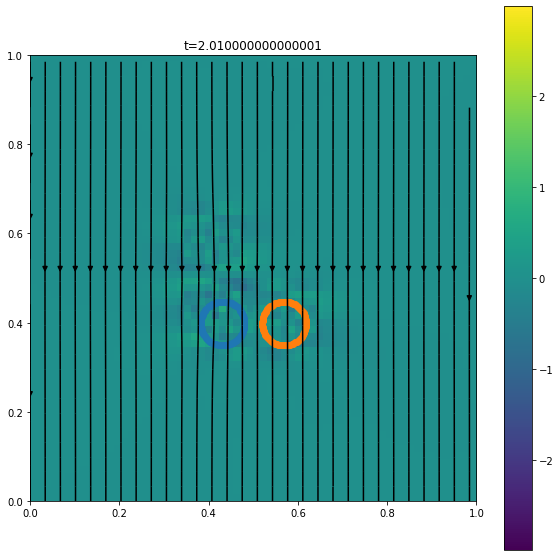

<Figure size 720x576 with 0 Axes>

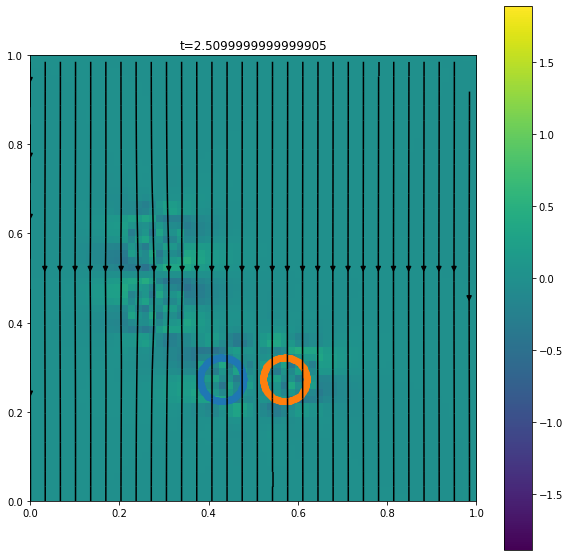

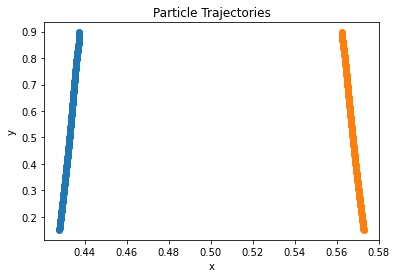

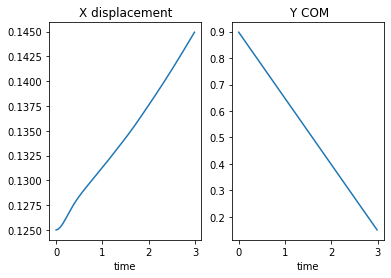

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

from ibsim import IBSIM
from fluid import FLUID
from circle import CIRCLE




def Sedimentation_pseudo(RADIUS=.05, SEPARATION=1./8):
    #### Initialization
    myfluid = FLUID()
    sim = IBSIM(myfluid)
    L = sim.fluid.L
    sim.add_solid(CIRCLE, 100, R=.05, R0=(0.5*L*(1-SEPARATION), 9*L/10))
    sim.add_solid(CIRCLE, 100, R=.05, R0=(0.5*L*(1+SEPARATION), 9*L/10))
    sim.fluid.u[1] = -.25
    
    plt.figure(figsize=(8, 8))
    sim.fluid.show_streamlines(cmap='autumn')
    plt.title('Initial Velocity Profile')
    plt.show()
    
    
    #### Run the experiment
    
    X1 = []
    X2 = []
    for i in range(300):
    # for i in range(5):
        sim.iterate()
        if i%50==0:
            plt.figure(figsize=(10, 8))
            sim.show_all()
            plt.title('t={}'.format(sim.fluid.t))
            plt.show()
        X1.append(np.sum(sim.solids[0].X, axis=1)/sim.solids[0].Nb)
        X2.append(np.sum(sim.solids[1].X, axis=1)/sim.solids[1].Nb)
    
    #### Results
    X1 = np.array(X1)
    X2 = np.array(X2)
    plt.scatter(X1[:,0], X1[:,1])
    plt.scatter(X2[:,0], X2[:,1])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Particle Trajectories')
    plt.show()

    t = sim.fluid.dt*np.arange(len(X2[:,0]))
    plt.subplot(1,2, 1); plt.plot(t, X2[:, 0] - X1[:, 0]); plt.title('X displacement'); plt.xlabel('time');
    plt.subplot(1,2, 2); plt.plot(t, 0.5*(X2[:, 1] + X1[:, 1])); plt.title(' Y COM'); plt.xlabel('time');
    plt.show()
    
    
    
Sedimentation_pseudo()

1.0
0.05
(0.33333333333333337, 0.9)
0.05
(0.6666666666666666, 0.9)


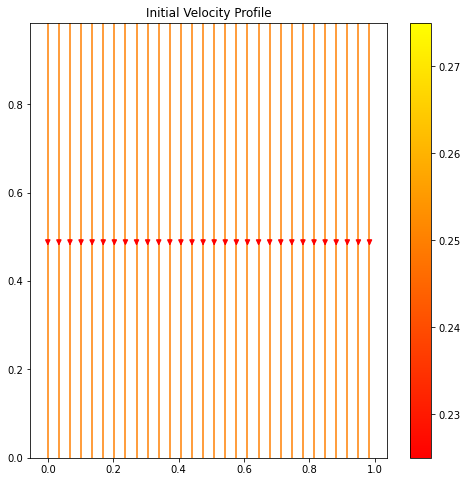

/home/jackie/Desktop/ib2.py:72: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  U[0,k]=np.sum(w*u[0][ii]);
/home/jackie/Desktop/ib2.py:73: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  U[1,k]=np.sum(w*u[1][ii]);
/home/jackie/Desktop/ib2.py:101: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  f[0][ii]+=(c*F[0,k])*w #Spr

<Figure size 720x576 with 0 Axes>

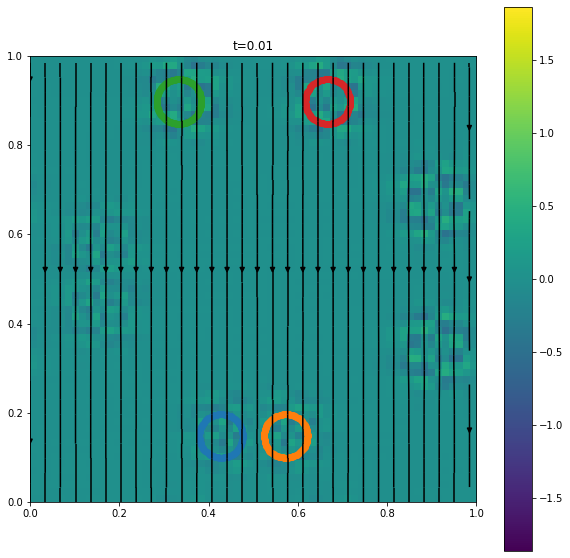

<Figure size 720x576 with 0 Axes>

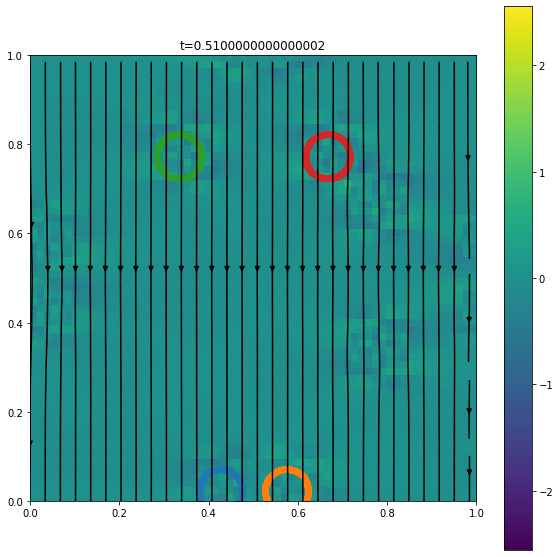

<Figure size 720x576 with 0 Axes>

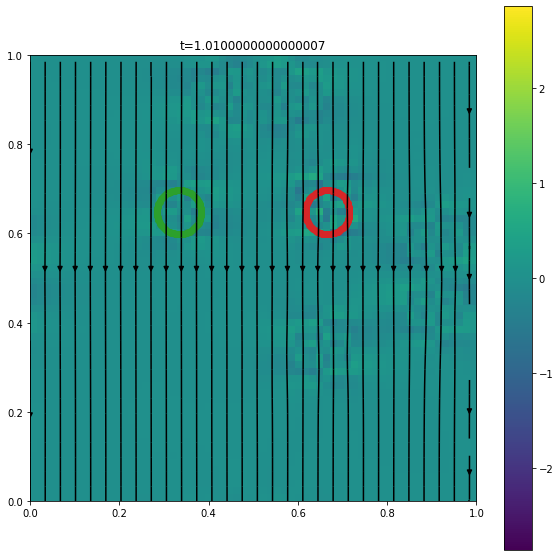

<Figure size 720x576 with 0 Axes>

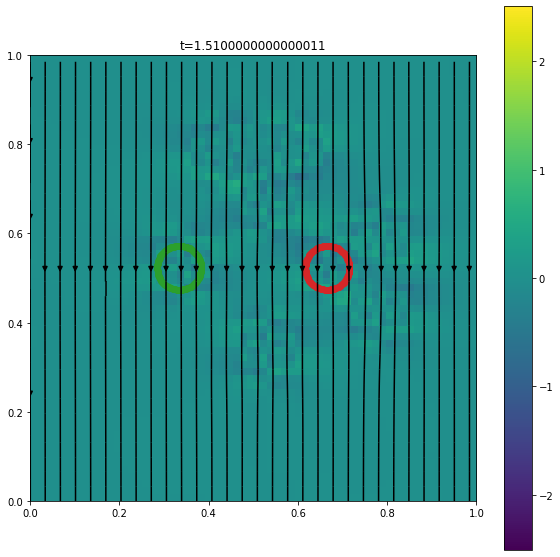

<Figure size 720x576 with 0 Axes>

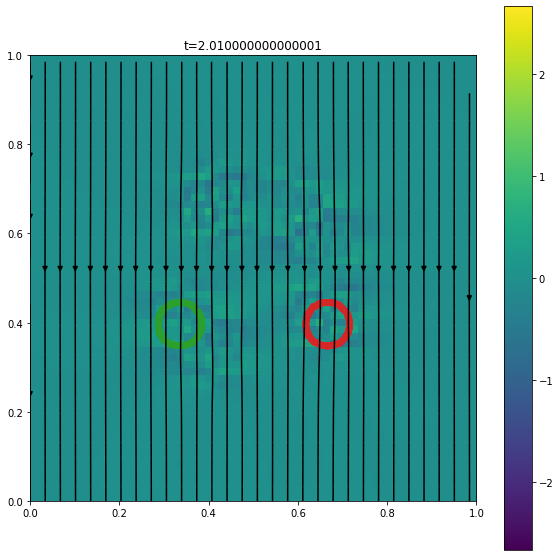

<Figure size 720x576 with 0 Axes>

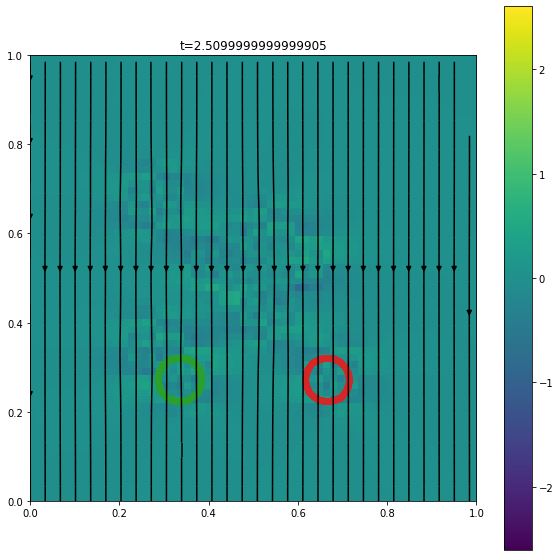

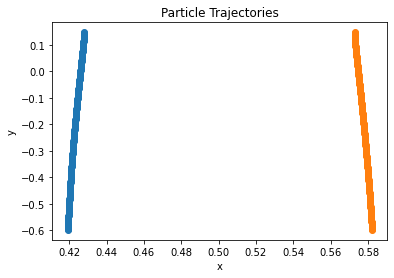

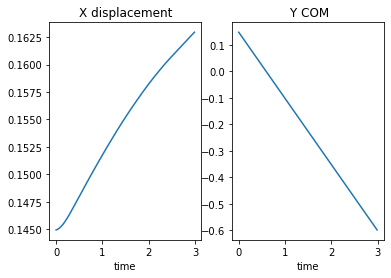

In [4]:
Sedimentation_pseudo(SEPARATION=1./3)







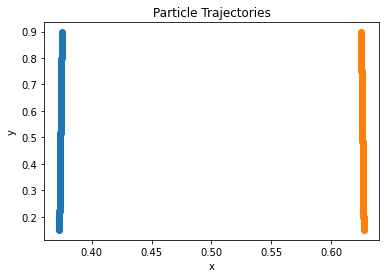

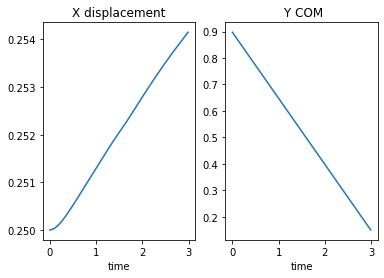